In [1]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

In [2]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '.'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train','val']}
print (image_datasets)
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train','val']}
print (dataloaders)
dataset_sizes = {x: len(image_datasets[x]) for x in ['train','val']}
print (dataset_sizes)
class_names = image_datasets['train'].classes

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

{'train': <torchvision.datasets.folder.ImageFolder object at 0x7f4336b97e90>, 'val': <torchvision.datasets.folder.ImageFolder object at 0x7f4336b97ed0>}
{'train': <torch.utils.data.dataloader.DataLoader object at 0x7f4336832e10>, 'val': <torch.utils.data.dataloader.DataLoader object at 0x7f43949f61d0>}
{'train': 22424, 'val': 2403}


In [3]:
print ("Hello")

Hello


In [4]:
print (class_names)


['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']


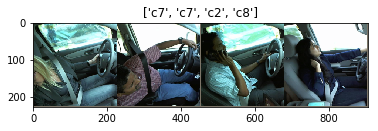

In [5]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))
#print (inputs,classes)

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [6]:
a,b = next(iter(dataloaders['train']))
print (a.shape)

torch.Size([4, 3, 224, 224])


In [7]:
model_ft = models.alexnet(pretrained =True)

In [8]:
print (type(model_ft.parameters))
count = 0


<type 'instancemethod'>


In [9]:
#model_ft = models.resnet18(pretrained = True)

In [10]:
print (model_ft.parameters)

<bound method AlexNet.parameters of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.

In [11]:
net = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            
        )
model_ft.classifier = net

In [12]:
print (model_ft.parameters)

<bound method AlexNet.parameters of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.

model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 10)

In [13]:
for param in model_ft.parameters():
    param.requires_grad = False

In [14]:
net2 = nn.Linear(4096, 10)
model_ft.classifier.add_module('classify',net2)

In [15]:
print (model_ft.parameters)

<bound method AlexNet.parameters of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.

In [16]:
#help (model_ft.classifier)

In [17]:
if torch.cuda.is_available():
    model_ft = model_ft.cuda()
    print ("Transferred to GPU")

Transferred to GPU


In [18]:
criterion = nn.CrossEntropyLoss()

In [19]:
#for i in range(20):
#    temp = (model_ft.parameters().next)
#print (temp)

In [20]:
optimizer = optim.SGD(model_ft.classifier.classify.parameters(),lr=0.005, momentum=0.9)
# Can add other args such as weight decay etc.

In [21]:
import math

In [22]:
T = 10 # Number of epochs
batch_size = 4
NB = math.ceil(len(image_datasets['train']) /batch_size) 
NB = int(NB)
print (NB)

5606


In [23]:
print (type(dataloaders['train']))

<class 'torch.utils.data.dataloader.DataLoader'>


In [24]:
#print (next(iter(dataloaders['train'])))

In [25]:
import torch.autograd as ag

In [26]:
import time

In [ ]:
for epoch in range(T):
    
    running_loss = 0.0
    # Set model to training mode
    model_ft.train()
    t0 = time.time()   
    for k in range(NB):
        
        # Obtain a batch of training data
        inputs, classes = next(iter(dataloaders['train']))
        #print (classes)
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward
        inputs = inputs.cuda()
        classes = classes.cuda()
        inputs = ag.Variable(inputs,requires_grad=True)
        classes = ag.Variable(classes, requires_grad =False)
        outputs = model_ft(inputs)
        #print ("Output")
        #print (outputs)
        
        # Error evaluation
        loss = criterion(outputs,classes)
        
        # Back Propagation
        loss.backward()
        
        # Parameter update
        optimizer.step()
        
        # Print averaged loss per minibatch every 100 mini-batches
        running_loss += loss[0]
        
        if k%1000 == 999:
            print ('[%d, %5d] loss: %.3f'% (epoch+1, k+1,np.mean(running_loss.cpu().data.numpy())/1000))
            running_loss = 0.0
    print('{} seconds'.format(time.time() - t0))
print ("Finished Training")
    
    

[1,  1000] loss: 6.710
[1,  2000] loss: 6.810
